## Plan of work <a id = "plan"> </a>

[1. Downloading and preparing data](#1.)<br>
[2. EDA](#2.)<br>

In [1]:
import re
import os
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk

from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from collections import defaultdict
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

nltk.download("stopwords")

C:\Users\chern\AppData\Local\Temp\ipykernel_6500\347378086.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chern\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1. Downloading and preparing data <a id = "1."> </a>

[Back to plan](#plan)

In [2]:
PATH = "./Data"

train = pd.read_csv(os.path.join(PATH, "train.csv"))
print(train.shape)
train.head()

(1306122, 3)


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [3]:
test = pd.read_csv(os.path.join(PATH, "test.csv"))
print(test.shape)
test.head()

(375806, 2)


,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


# 2. EDA <a id = "2."> </a>

[Back to plan](#plan)

## Target Distributions

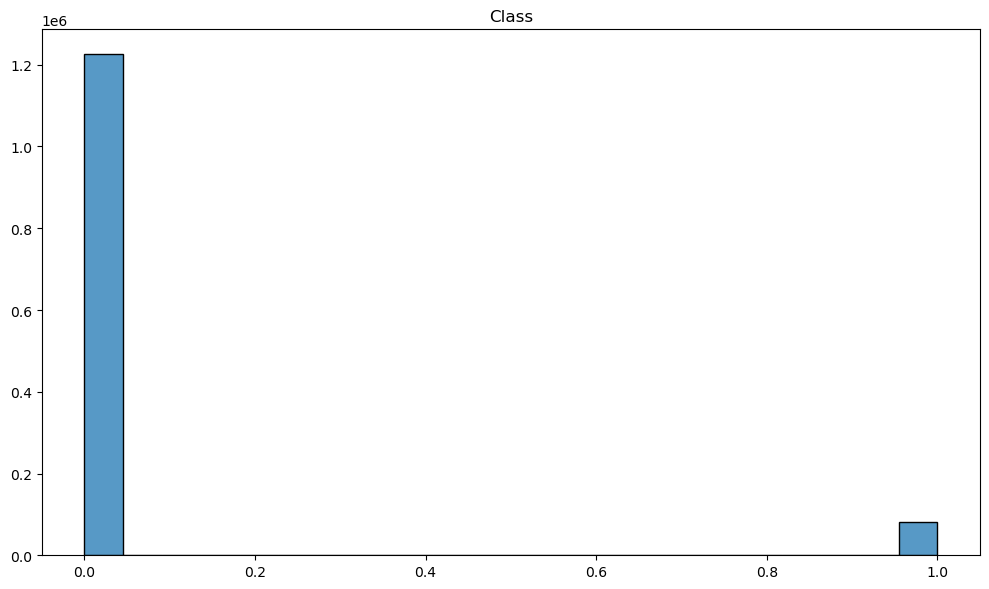

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.histplot(x="target", data=train, ax=axes, zorder=2)
axes.set_title("Class")
axes.set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()

### (As a percentage)

In [5]:
print(train.target.value_counts(normalize=True))

0    0.93813
1    0.06187
Name: target, dtype: float64


## Number words

In [6]:
print("Number words in train dataset: ", len(
    " ".join(train["question_text"].tolist()).split()))
print("Number words in test dataset: ", len(
    " ".join(test["question_text"].tolist()).split()))

Number words in train dataset:  16723076
Number words in test dataset:  4814391


## Vocabulary size

In [7]:
vocab_size = len(set(" ".join(train["question_text"].tolist()).split(
) + " ".join(test["question_text"].tolist()).split()))
print("Vocabulary size: ", vocab_size)

Vocabulary size:  597383


## Movie Description Example

In [8]:
def print_texts(df):
    inner_html = ""
    for idx, row in df.iterrows():
        inner_html += f"""
        <td style="vertical-align:top; border-right: 1px solid #7accd8">
        <h3 style="text-align:left">{row.qid}</h3>
        <hr>
            <dl>
                <dt> Genre </dt>
                <dd>{row.target}</dd>
            </dl>
            
            <hr>
            <p>
            {row.question_text}
            </p>
        </td>
        """
    display(HTML(f"""
    <table style="font-family: monospace;">
        <tr>
             {inner_html}
        </tr>
    </table>
    """))


In [9]:
class_0 = train[train.target == 0].head(3)
print_texts(class_0)

00002165364db923c7e6 Genre 0 How did Quebec nationalists see their province as a nation in the 1960s?,"000032939017120e6e44 Genre 0 Do you have an adopted dog, how would you encourage people to adopt and not shop?",0000412ca6e4628ce2cf Genre 0 Why does velocity affect time? Does velocity affect space geometry?


In [10]:
class_1 = train[train.target == 1].head(3)
print_texts(class_1)

0000e91571b60c2fb487 Genre 1 Has the United States become the largest dictatorship in the world?,00013ceca3f624b09f42 Genre 1 Which babies are more sweeter to their parents? Dark skin babies or light skin babies?,0004a7fcb2bf73076489 Genre 1 If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?


## Text Analysis

### Number of Characters

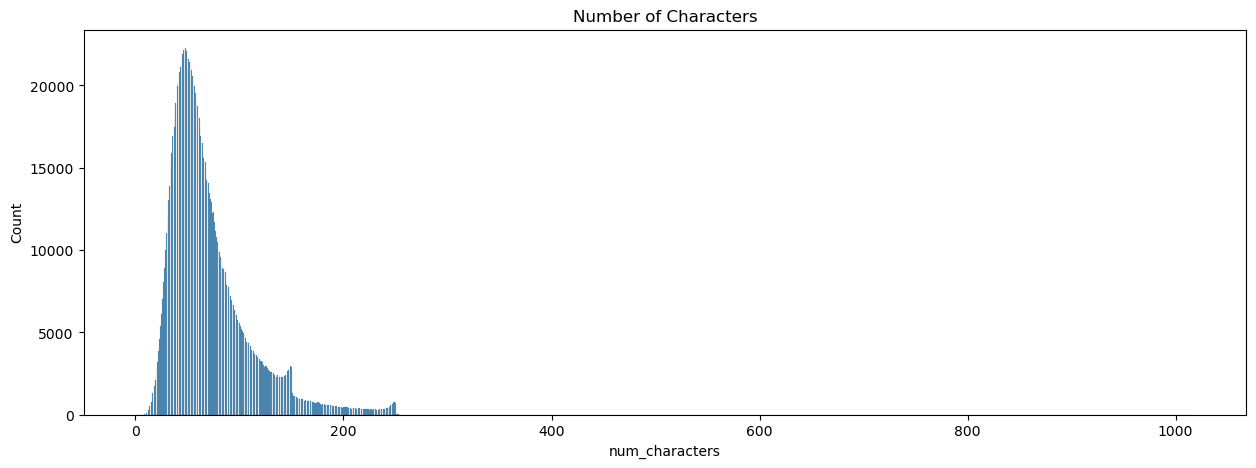

In [11]:
fig = plt.figure(figsize=(15, 5))
train["num_characters"] = train["question_text"].str.len()

sns.histplot(data=train, x="num_characters")
plt.title("Number of Characters")
plt.show()

### Number of Words

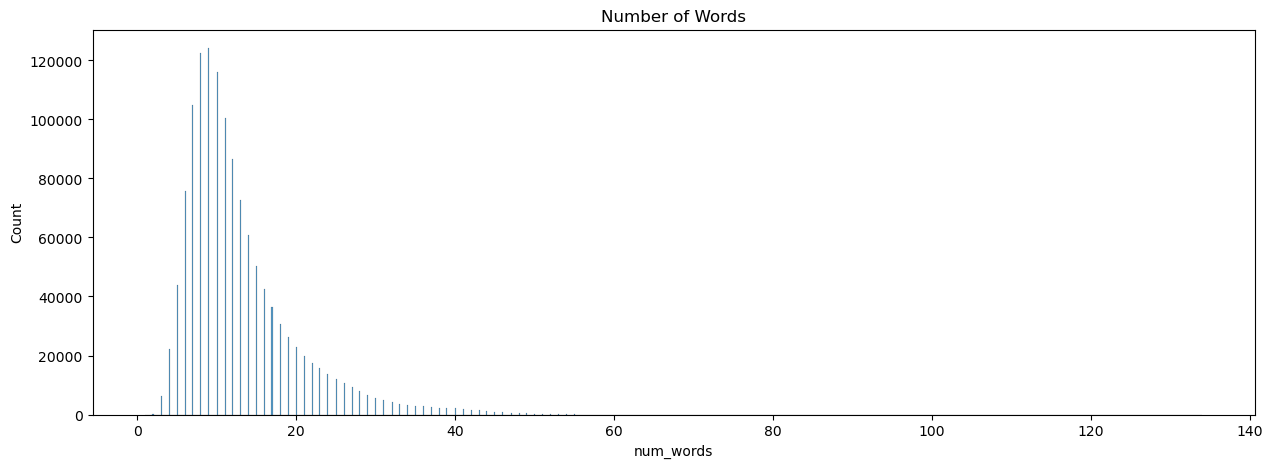

In [12]:
fig = plt.figure(figsize=(15, 5))
train["num_words"] = train["question_text"].apply(
    lambda x: len(str(x).split()))
sns.histplot(data=train, x="num_words")
plt.title("Number of Words")
plt.show()

In [13]:
train["num_words"].describe()


count    1.306122e+06
mean     1.280361e+01
std      7.052437e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.500000e+01
max      1.340000e+02
Name: num_words, dtype: float64

### Common Stopwords

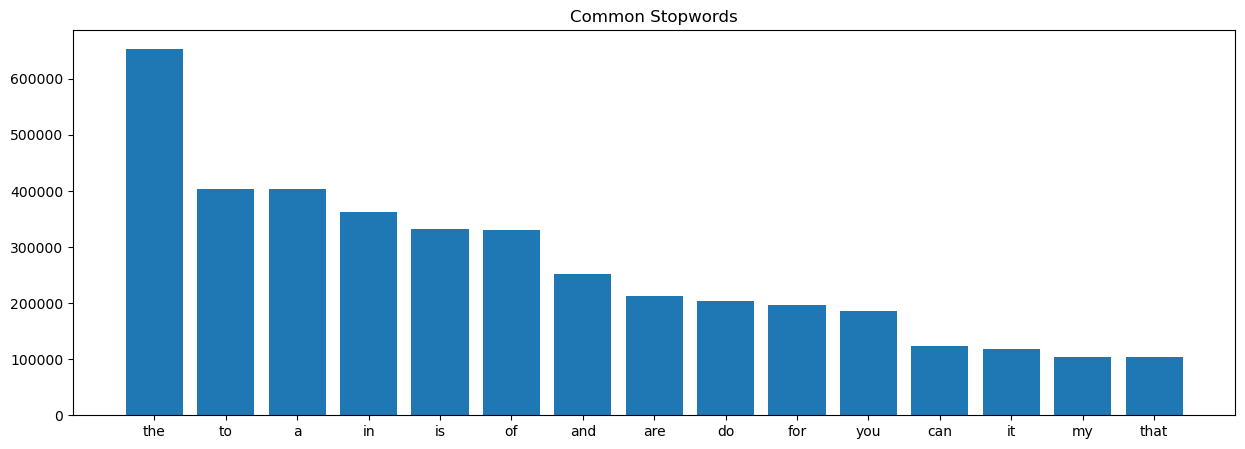

In [15]:
fig = plt.figure(figsize=(15, 5))

stop_words = set(stopwords.words("english"))
corpus = "".join(map(str, train.question_text)).split()

dic = defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word] += 1
top_words = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
x, y = zip(*top_words)
plt.bar(x, y)
plt.title("Common Stopwords")
plt.show()

### Word Cloud

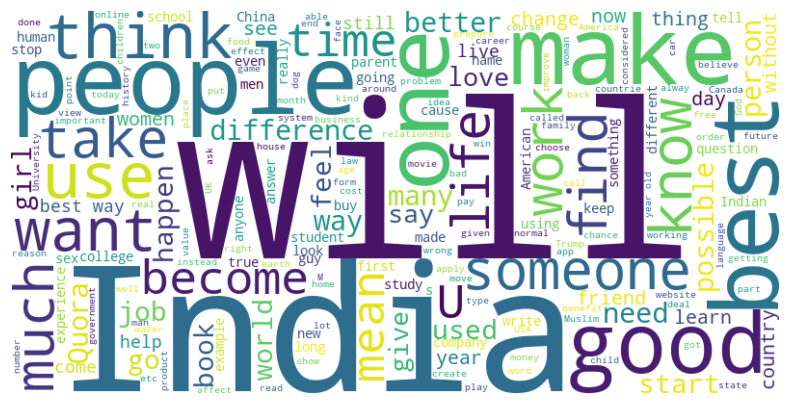

In [16]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    "".join(map(str, train.question_text)))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()